In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

import pickle
from matplotlib import pyplot as plt

Import Bitcoin Data

In [2]:
bitcoinData = pd.read_csv("Bitcoin.csv")
bitcoinData

,SNo,Date,Price,Open,High,Low,Vol.,Change %
0,1,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.00
1,2,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00
2,3,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00
3,4,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00
4,5,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00
...,...,...,...,...,...,...,...,...
4051,4052,2021-08-20,49324.0,46756.7,49343.3,46646.8,83190.0,5.49
4052,4053,2021-08-21,48875.8,49330.0,49719.1,48293.5,18200.0,-0.91
4053,4054,2021-08-22,49254.5,48870.4,49480.3,48151.0,49320.0,0.77
4054,4055,2021-08-23,49539.7,49255.4,50498.8,49038.6,75370.0,0.58


Plotting Data: Data entry (by date) vs. Highest Price of the Day

Text(0, 0.5, 'Highest Price of the day')

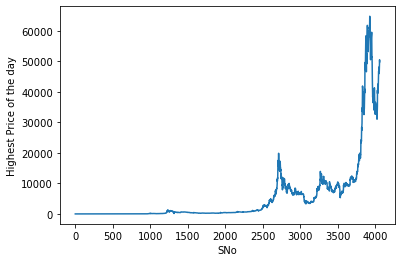

In [3]:
plt.plot(bitcoinData.SNo, bitcoinData.High)
plt.xlabel("SNo")
plt.ylabel("Highest Price of the day")

Sanatize the data to start when Bitcoin began to increase drastically (December 1, 2017).
Plot the updated dataset

Text(0, 0.5, 'Highest Price of the day')

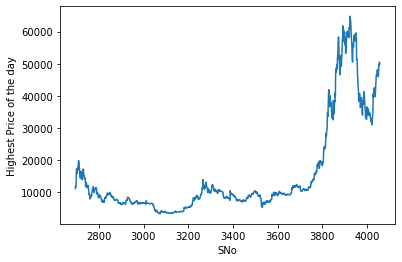

In [4]:
bitcoinData = bitcoinData.iloc[2694:]
plt.plot(bitcoinData.SNo, bitcoinData.High)
plt.xlabel("SNo")
plt.ylabel("Highest Price of the day")

Sanatize data so that the models can train the data, i.e. remove non-numerical Columns 

In [5]:
bitcoinData = bitcoinData.drop('Date', axis = 1)

Splitting the data into a features matrix and a target array
Creating a 75% train and 25% test split

In [6]:
XBit = bitcoinData.drop('High', axis = 1)
yBit = bitcoinData['High']
yBit = yBit.astype(int)
print(XBit.shape, yBit.shape)
XBit_train, XBit_test, yBit_train, yBit_test = train_test_split(XBit, yBit, test_size=0.25, random_state=0)

(1362, 6) (1362,)


MODEL: LINEAR REGRESSION 

In [7]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression(fit_intercept = True)
model_lr.fit(XBit_train, yBit_train)
pred_lr = model_lr.predict(XBit_test)

Series of test to see how accurate the model is.

In [8]:
mean_absolute_error(yBit_test, pred_lr)

188.31021899463005

In [9]:
print("Train accuracy is %.2f " % (model_lr.score(XBit_train, yBit_train)*100))
print("Test accuracy is %.2f " % (model_lr.score(XBit_test, yBit_test)*100))

Train accuracy is 99.95 
Test accuracy is 99.94 


In [10]:
print("Mean squared error: %.2f" % mean_squared_error(yBit_test, pred_lr))

Mean squared error: 140326.81


In [11]:
print("Coefficient of determination: %.2f" % r2_score(yBit_test, pred_lr))

Coefficient of determination: 1.00


MODEL: EPSILON-SUPPORT VECTOER REGRESSION

In [12]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(XBit_train, yBit_train)
pred_svr = model_svr.predict(XBit_test)

Series of test to see how accurate the model is.

In [13]:
print("Train accuracy is %.2f " % (model_svr.score(XBit_train, yBit_train)*100))
print("Test accuracy is %.2f " % (model_svr.score(XBit_test, yBit_test)*100))

Train accuracy is -15.78 
Test accuracy is -18.23 


In [14]:
print("Mean squared error: %.2f" % mean_squared_error(yBit_test, pred_svr))

Mean squared error: 277798601.06


In [15]:
print("Coefficient of determination: %.2f" % r2_score(yBit_test, pred_svr))

Coefficient of determination: -0.18


MODEL: LOGISTIC REGRESSION

In [16]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(XBit_train, yBit_train)
pred_log = model_log.predict(XBit_test)

C:\Users\Tony\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Series of test to see how accurate the model is.

In [17]:
print("Accuracy score: %f" % accuracy_score(yBit_test, pred_log))

Accuracy score: 0.000000


In [18]:
print("Train accuracy is %f " % (model_log.score(XBit_train, yBit_train)*100))
print("Test accuracy is %f " % (model_log.score(XBit_test, yBit_test)*100))

Train accuracy is 0.293830 
Test accuracy is 0.000000 


In [19]:
print("Mean squared error: %f" % mean_squared_error(yBit_test, pred_log))

Mean squared error: 83544897.234604


In [20]:
print("Coefficient of determination: %f" % r2_score(yBit_test, pred_log))

Coefficient of determination: 0.644449


Pickle the models

In [21]:
# pd.to_pickle(MODEL_OBJECT_NAME,r'FILE_PATH')

# pd.to_pickle(model_lr,r'c:\Users\Tony\Downloads\model_lr.pickle')
# pd.to_pickle(model_svr,r'c:\Users\Tony\Downloads\model_svr.pickle')
# pd.to_pickle(model_log,r'c:\Users\Tony\Downloads\model_log.pickle')